In [1]:
import csv

tA = [] # sigA
tB = [] # sigB
tC = [] # sigC
tD = [] # sigD
dataA = [] # sigA
dataB = [] # sigB
dataC = [] # sigC
dataD = [] # sigD

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigA.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        tA.append(float(row[0])) # leftmost column
        dataA.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigB.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        tB.append(float(row[0])) # leftmost column
        dataB.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigC.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        tC.append(float(row[0])) # leftmost column
        dataC.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

with open('/Users/theyiranhuang/Documents/GitHub/ME433/HW10/dsp/sigD.csv') as f:
    # open the csv file
    reader = csv.reader(f)
    for row in reader:
        # read the rows 1 one by one
        tD.append(float(row[0])) # leftmost column
        dataD.append(float(row[1])) # second column
        # data2.append(float(row[2])) # third column

for i in range(2):
    # print the data to verify it was read
    print(str(tA[i]) + ", " + str(dataA[i]))
    print(str(tB[i]) + ", " + str(dataB[i]))
    print(str(tC[i]) + ", " + str(dataC[i]))
    print(str(tD[i]) + ", " + str(dataD[i]))


0.0, 2.3580832635385773
0.0, 6.19194348432419
0.0, 0.0
0.0, -0.0379
0.0001, 2.615750351752668
0.00030303030303030303, 2.420961652128782
0.0004, 0.0
0.0025, -0.0089


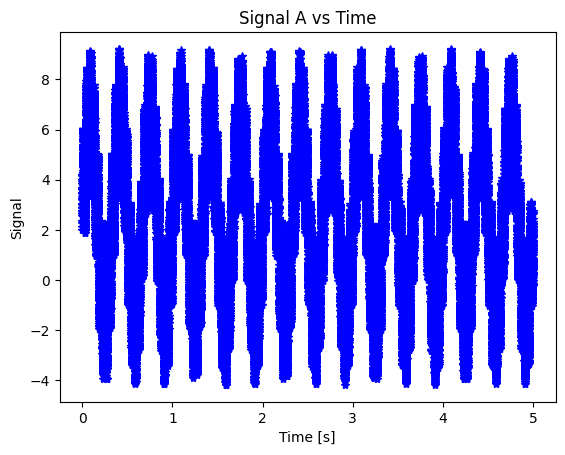

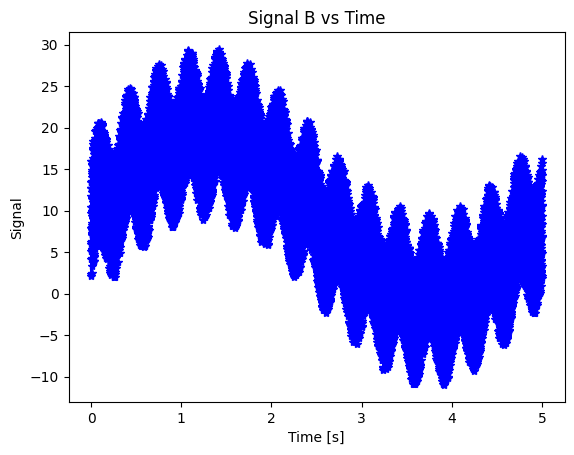

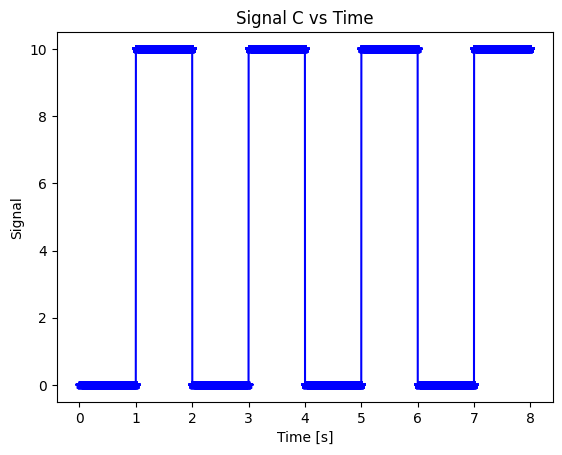

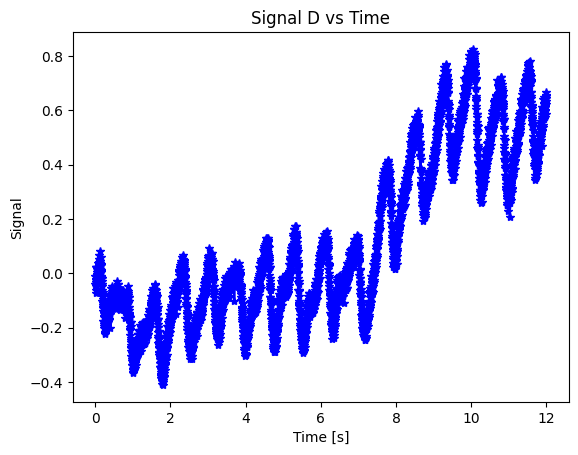

In [2]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # for sine function

# dt = 1.0/100.0 # 100Hz
# t = np.arange(0.0, 5.0, dt) # for 5s

# s = 2.0 * np.sin(2 * np.pi * 2.3 * t) + 2.5 # 2.3Hz

plt.plot(tA,dataA,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal A vs Time')
plt.show()

plt.plot(tB,dataB,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal B vs Time')
plt.show()

plt.plot(tC,dataC,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal C vs Time')
plt.show()

plt.plot(tD,dataD,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal D vs Time')
plt.show()

In [42]:
def calc_fft(t,data):
    dt = (t[-1]-t[0])/len(t)
    Fs = 1.0/dt # sample rate
    # print("Fs = ", Fs)
    Ts = t[-1]
    ts = np.arange(0,t[-1],Ts) # time vector
    y = data # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    return frq,Y

def plot_fft(t,data):
    frq,Y = calc_fft(t,data)
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,data,'b')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax1.set_title('Signal vs Time')
    ax2.loglog(frq,abs(Y),'b') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    ax2.set_title('Signal FFT')
    plt.tight_layout()
    plt.show()

def compare_fft(t1, data1, t2, data2):
    frq1,Y1 = calc_fft(t1,data1) # unfiltered
    frq2,Y2 = calc_fft(t2,data2) # filtered
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t1,data1,'b',t2,data2,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax1.set_title('Signal vs Time')
    ax2.loglog(frq1,abs(Y1),'b',frq2,abs(Y2),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    ax2.set_title('Signal FFT')
    plt.tight_layout()
    plt.show()

In [50]:
def maf(num,t,data):
    maf = []
    for i in range(len(data)):
        if i < num:
            maf.append(0)
        else:
            avg = sum(data[i-num:i])/num
            maf.append(avg)
    frq1,Y1 = calc_fft(t,data) # unfiltered
    frq2,Y2 = calc_fft(t,maf) # filtered
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,data,'b',t,maf,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax1.set_title(f'Signal vs Time (Number of points sampled = {num})')
    ax2.loglog(frq1,abs(Y1),'b',frq2,abs(Y2),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    ax2.set_title(f'Signal FFT (Number of points sampled = {num})')
    plt.tight_layout()
    plt.show()


In [52]:
def iir(A,B,t,data):
    iir = []
    avg = 0
    for i in range(len(data)):
        avg = A*avg+B*data[i]
        iir.append(avg)
    frq1,Y1 = calc_fft(t,data) # unfiltered
    frq2,Y2 = calc_fft(t,iir) # filtered
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,data,'b',t,iir,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax1.set_title(f'Signal vs Time (IIR weights: A={A}, B={B}))')
    ax2.loglog(frq1,abs(Y1),'b',frq2,abs(Y2),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    ax2.set_title(f'Signal FFT (IIR weights: A={A}, B={B}))')
    plt.tight_layout()
    plt.show()

Parameters for A: 500 Hz cutoff frequency, 2000 Hz transmission bandwith, blackman window type

In [36]:
hA = [
    0.002539993835013455,
    0.005744201059608381,
    0.014708336514842966,
    0.031456060871750798,
    0.055482250809603978,
    0.083441910965448618,
    0.109888911438294115,
    0.128859581669094864,
    0.135757505672685519,
    0.128859581669094864,
    0.109888911438294129,
    0.083441910965448646,
    0.055482250809603985,
    0.031456060871750791,
    0.014708336514842969,
    0.005744201059608387,
    0.002539993835013455,
]

Parameters for B: 300 Hz cutoff frequency, 600 Hz transmission bandwith, blackman window type

In [20]:
hB = [
    -0.002594902676614731,
    -0.004278163037480788,
    -0.006500785617685743,
    -0.004671489196324270,
    0.008320467857365841,
    0.037586520624280161,
    0.081533145325213233,
    0.130254772627427767,
    0.168693556960344049,
    0.183313754266949014,
    0.168693556960344049,
    0.130254772627427795,
    0.081533145325213274,
    0.037586520624280161,
    0.008320467857365845,
    -0.004671489196324277,
    -0.006500785617685747,
    -0.004278163037480788,
    -0.002594902676614731,
]

Parameters for C: 500 Hz cutoff frequency, 500 Hz transmission bandwith, blackman window type

In [22]:
hC = [
    -0.001872521167090275,
    0.003076697131615380,
    0.010843204057061970,
    -0.000000000000000006,
    -0.040902339055576782,
    -0.044692984361066959,
    0.081011737060229752,
    0.292371308720313250,
    0.400329795229027119,
    0.292371308720313305,
    0.081011737060229766,
    -0.044692984361066980,
    -0.040902339055576789,
    -0.000000000000000006,
    0.010843204057061974,
    0.003076697131615383,
    -0.001872521167090275,
]

Parameters for D: 20 Hz cutoff frequency, 80 Hz transmission bandwith, blackman window type

In [24]:
hD = [
    0.002539993835013455,
    0.005744201059608381,
    0.014708336514842966,
    0.031456060871750798,
    0.055482250809603978,
    0.083441910965448618,
    0.109888911438294115,
    0.128859581669094864,
    0.135757505672685519,
    0.128859581669094864,
    0.109888911438294129,
    0.083441910965448646,
    0.055482250809603985,
    0.031456060871750791,
    0.014708336514842969,
    0.005744201059608387,
    0.002539993835013455,
]

In [63]:
def fir(t,data):
    fir = []
    avg = 0
    h = []
    cfrq = 0
    tband = 0
    if data == dataA:
        h = hA
        cfrq = 500
        tband = 2000
    elif data == dataB:
        h = hB
        cfrq = 300
        tband = 600
    elif data == dataC:
        h = hC
        cfrq = 500
        tband = 500
    elif data == dataD:
        h = hD
        cfrq = 20
        tband = 80
    print(len(h))
    for i in range(len(data)):
        if i < len(h):
            fir.append(0)
        else:
            avg = 0
            for j in range(len(h)):
                avg += h[j]*data[i-j]
            fir.append(avg)
    frq1,Y1 = calc_fft(t,data) # unfiltered
    frq2,Y2 = calc_fft(t,fir) # filtered
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,data,'b',t,fir,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax1.set_title(f'Signal vs Time (FIR: cutoff = {cfrq} Hz, bandwidth = {tband} Hz), window type = blackman')
    ax2.loglog(frq1,abs(Y1),'b',frq2,abs(Y2),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    ax2.set_title(f'Signal FFT (FIR: cutoff = {cfrq} Hz, bandwidth = {tband} Hz), window type = blackman')
    plt.tight_layout()
    plt.show()


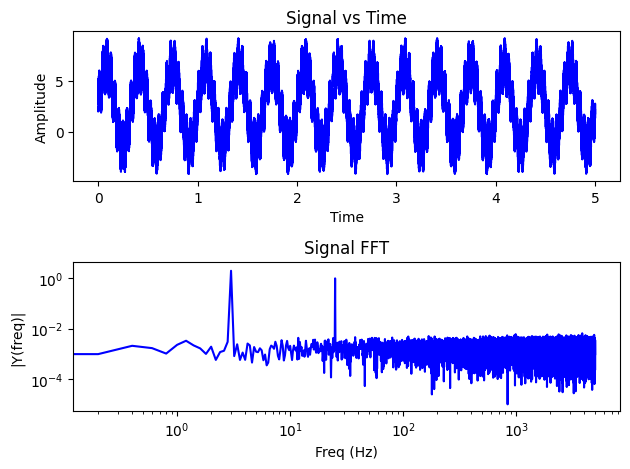

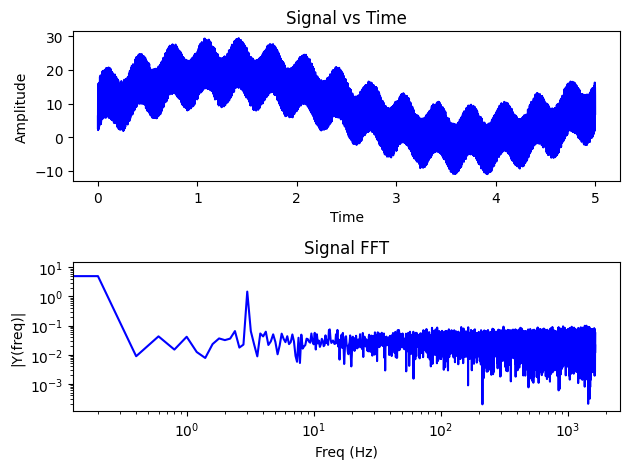

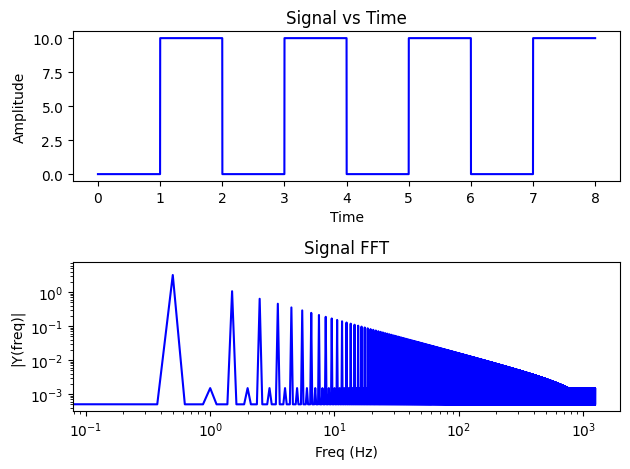

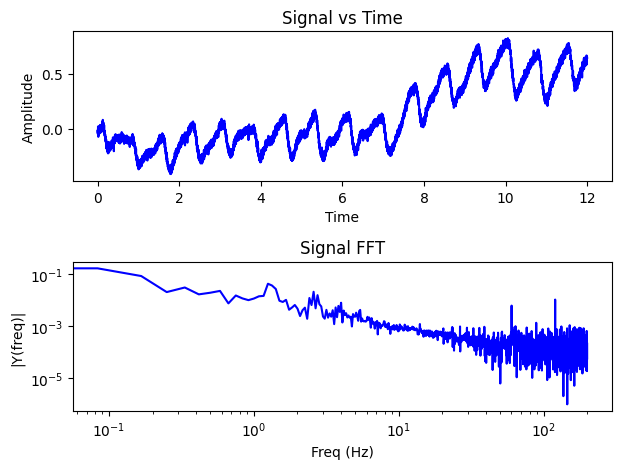

In [38]:
plot_fft(tA, dataA)
plot_fft(tB, dataB)
plot_fft(tC, dataC)
plot_fft(tD, dataD)

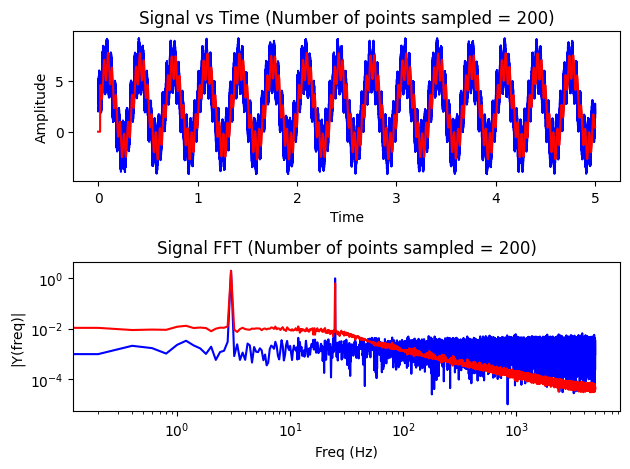

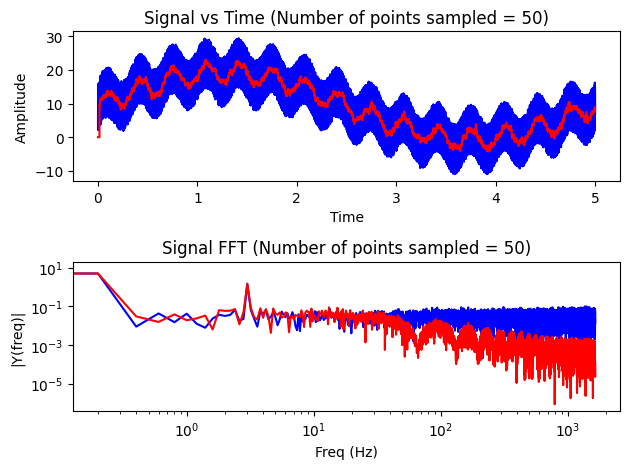

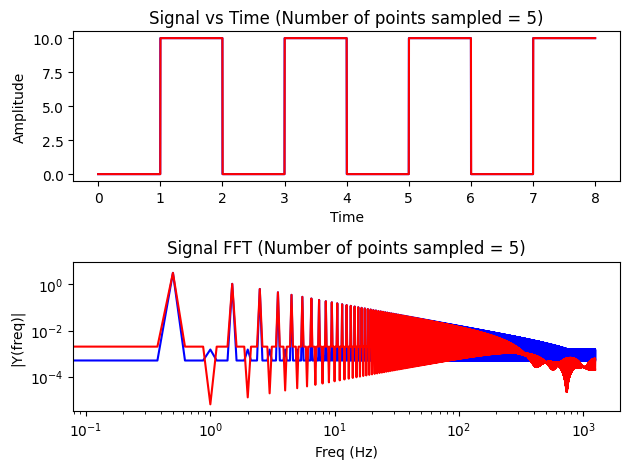

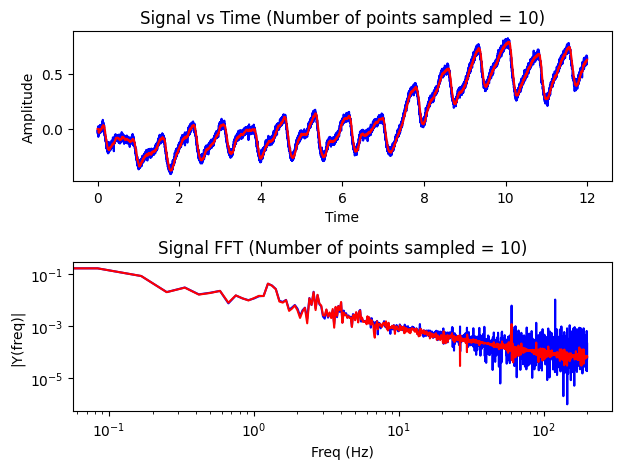

In [51]:
maf(200, tA, dataA)
maf(50, tB, dataB)
maf(5, tC, dataC)
maf(10, tD, dataD)

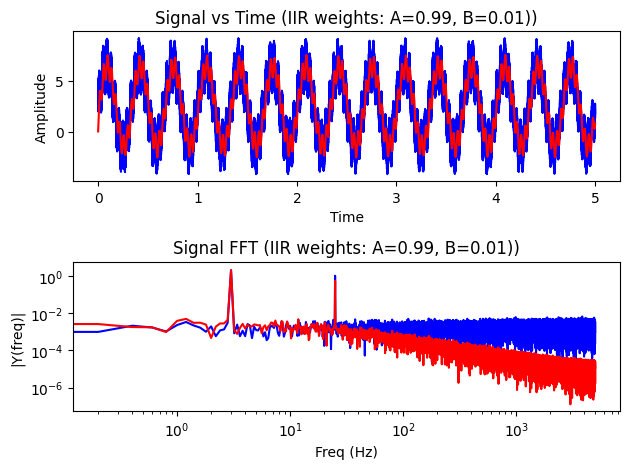

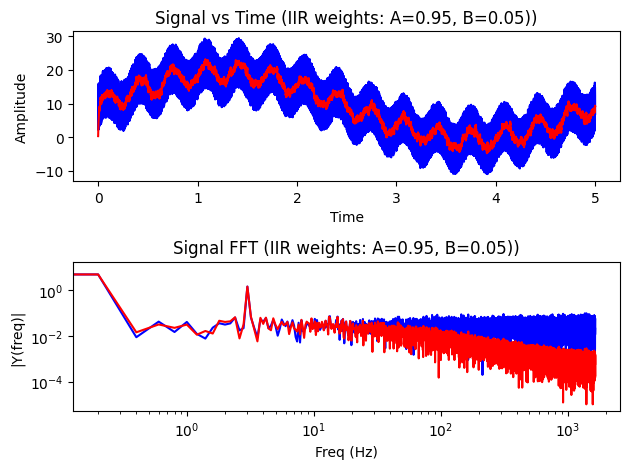

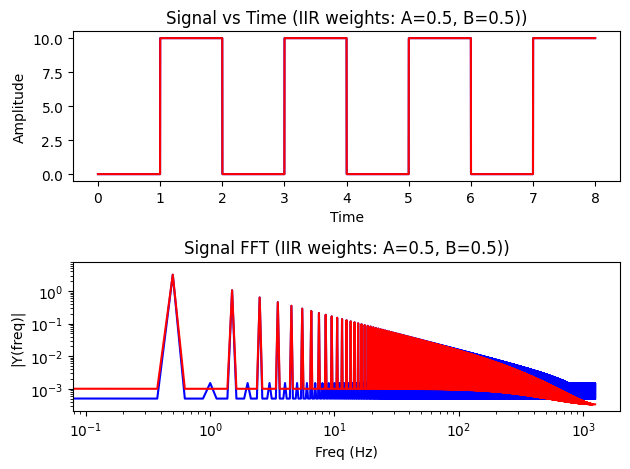

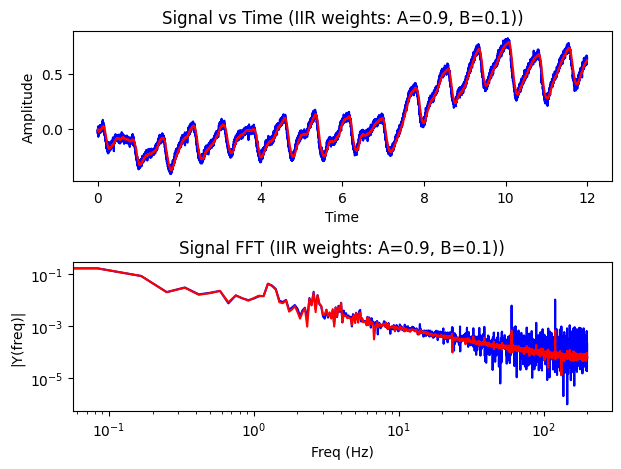

In [57]:
iir(0.99, 0.01, tA, dataA)
iir(0.95, 0.05, tB, dataB)
iir(0.5, 0.5, tC, dataC)
iir(0.9, 0.1, tD, dataD)

17


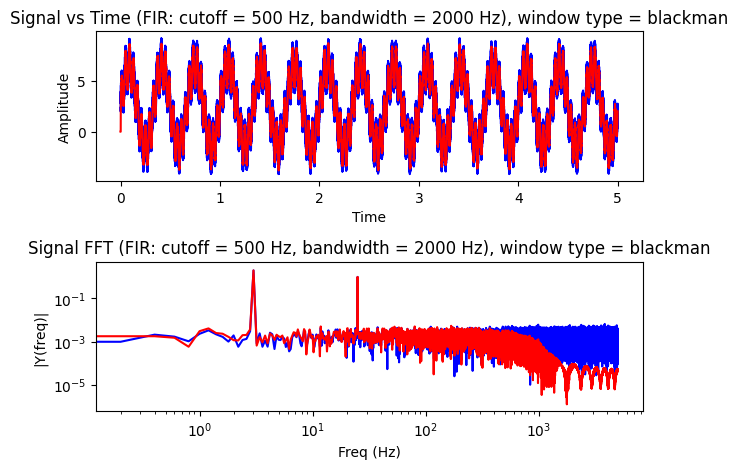

19


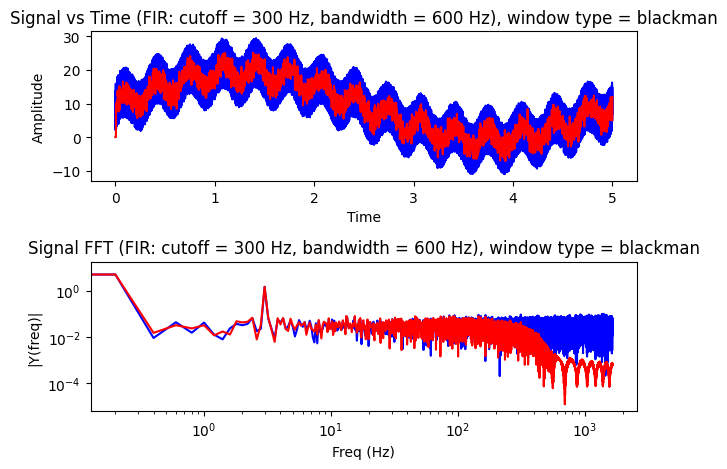

17


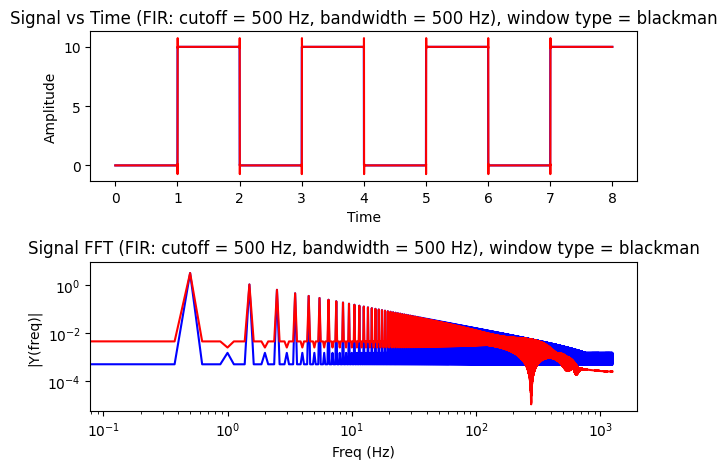

17


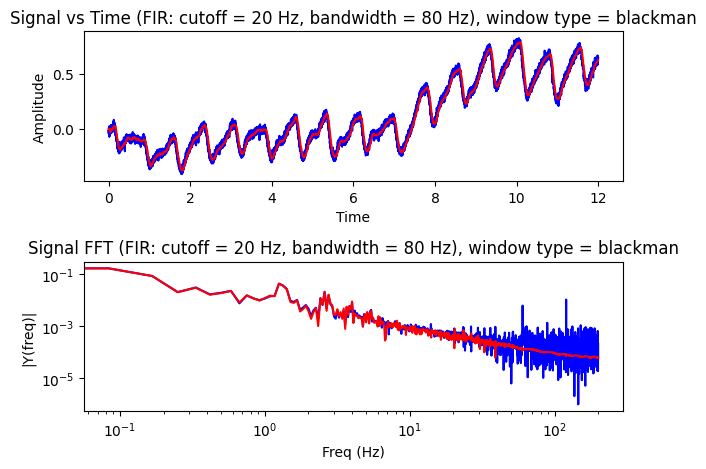

In [64]:
fir(tA,dataA)
fir(tB,dataB)
fir(tC,dataC)
fir(tD,dataD)